### Datos

In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Conv2D,Flatten, Activation, MaxPooling2D

In [2]:
data = np.load("data_train.pkl",allow_pickle=True,encoding='latin1')
print(data.keys())

dict_keys(['temp_images', 'SNR_images', 'diff_images', 'sci_images', 'labels', 'ID'])


In [3]:
print("shape original:",data['sci_images'].shape)
imagenes_1 = data['sci_images'].reshape(-1,21,21,1)
imagenes_2 = data['temp_images'].reshape(-1,21,21,1)
imagenes_3 = data['SNR_images'].reshape(-1,21,21,1)
imagenes_4 = data['diff_images'].reshape(-1,21,21,1)

images = np.concatenate((imagenes_1,imagenes_2,imagenes_3, imagenes_4), axis=3)
print("shape nueva:",images.shape)

y = data['labels'].reshape(-1,1)
ohe = OneHotEncoder(sparse=False)
y = ohe.fit_transform(y)
y


shape original: (4026, 441)
shape nueva: (4026, 21, 21, 4)


array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [39]:
X_train, X_val, y_train, y_val = train_test_split(images, y, test_size=0.20, random_state=42)
print("X_train shape:",X_train.shape)
print("X_val shape:",X_val.shape)
print("y_train shape:",y_train.shape)
print("y_val shape:",y_val.shape)

X_train shape: (3220, 21, 21, 4)
X_val shape: (806, 21, 21, 4)
y_train shape: (3220, 2)
y_val shape: (806, 2)


### Modelo para Clasificar
Usamos el mismo modelo de la tarea 1

In [36]:
from tensorflow.keras import layers

In [48]:
model = Sequential()
model.add(Conv2D(64,kernel_size = 2,input_shape = (21,21,4),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,kernel_size = 2,input_shape = (21,21,4), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,kernel_size = 2,input_shape = (21,21,4), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,kernel_size = 2,input_shape = (21,21,4), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(units= 64,activation='sigmoid'))
model.add(Dense(units= 64,activation='sigmoid'))
model.add(Dense(units= 64,activation='sigmoid'))
model.add(Dense(units = 2,activation = 'softmax'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(x = X_train , y = y_train, batch_size = 50, epochs = 15, validation_data = (X_val,y_val))

Epoch 1/15
65/65 [==============================] - 2s 21ms/step - loss: 0.4558 - accuracy: 0.8481 - val_loss: 0.2383 - val_accuracy: 0.9293
Epoch 2/15
65/65 [==============================] - 1s 17ms/step - loss: 0.1295 - accuracy: 0.9683 - val_loss: 0.1268 - val_accuracy: 0.9653
Epoch 3/15
65/65 [==============================] - 1s 17ms/step - loss: 0.0888 - accuracy: 0.9780 - val_loss: 0.0821 - val_accuracy: 0.9814
Epoch 4/15
65/65 [==============================] - 1s 17ms/step - loss: 0.0694 - accuracy: 0.9823 - val_loss: 0.0767 - val_accuracy: 0.9789
Epoch 5/15
65/65 [==============================] - 1s 17ms/step - loss: 0.0694 - accuracy: 0.9817 - val_loss: 0.1239 - val_accuracy: 0.9615
Epoch 6/15
65/65 [==============================] - 1s 17ms/step - loss: 0.0711 - accuracy: 0.9817 - val_loss: 0.0810 - val_accuracy: 0.9777
Epoch 7/15
65/65 [==============================] - 1s 18ms/step - loss: 0.0525 - accuracy: 0.9873 - val_loss: 0.0721 - val_accuracy: 0.9814
Epoch 8/15
65

In [54]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 21, 21, 64)        1088      
                                                                 
 activation_36 (Activation)  (None, 21, 21, 64)        0         
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 10, 10, 64)        16448     
                                                                 
 activation_37 (Activation)  (None, 10, 10, 64)        0         
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                

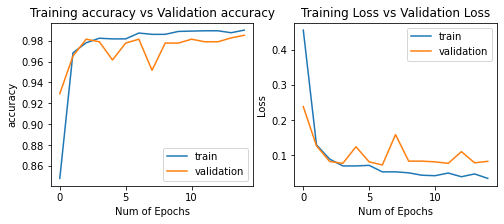

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.xlabel("Num of Epochs")  
plt.ylabel("accuracy")  
plt.title("Training accuracy vs Validation accuracy")  
plt.legend(['train','validation'])

plt.subplot(1,2,2) 
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])
plt.savefig('accuracy.png')

### Evaluación

Evaluamos nuestro modelo usando el conjunto de test

In [51]:
data_test = np.load("unlab_test.pkl",allow_pickle=True,encoding='latin1')
data_test.keys()
imagenes_test_1 = data_test['sci_images'].reshape(-1,21,21,1)
imagenes_test_2 = data_test['temp_images'].reshape(-1,21,21,1)
imagenes_test_3 = data_test['SNR_images'].reshape(-1,21,21,1)
imagenes_test_4 = data_test['diff_images'].reshape(-1,21,21,1)

x_test = np.concatenate((imagenes_test_1,imagenes_test_2,imagenes_test_3, imagenes_test_4), axis=3)
print("shape nueva:",x_test.shape)

shape nueva: (1000, 21, 21, 4)


In [52]:
labels_test = np.load("labels_test.pkl",allow_pickle=True,encoding='latin1')
y_test = labels_test['labels']#.reshape(-1,1)


In [53]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,-1)

print("accuracy: ", accuracy_score(y_test, y_pred))
print("precision: ", precision_score(y_test, y_pred, average = 'macro'))
print("recall: ", recall_score(y_test, y_pred, average = 'macro'))
print("f1: ", f1_score(y_test, y_pred, average = 'macro'))

32/32 [==============================] - 0s 4ms/step
accuracy:  0.992
precision:  0.9918726854168752
recall:  0.9921406511001887
f1:  0.9919907412969392


### Autoencoder variacional
Para armar nuestro VAE usaremos capas probabilisticas, para ello utilizaremos Tensorflow Probability ya que nos permitirá usar las capas DenseFlipout

In [13]:
import tensorflow_probability as tfp

In [76]:
def red_bayesiana(x_train):
    kl_divergence_function = (lambda q, p, _: tfp.distributions.kl_divergence(q, p) / tf.cast(10, dtype=tf.float32))
    modelo_simple = tf.keras.models.Sequential()
    
    modelo_simple.add(tf.keras.layers.Flatten(input_shape=x_train.shape[1:])) #Son imágenes. Hay que transformarlas a un vector primero
    
    modelo_simple.add(tfp.python.layers.DenseFlipout(64, kernel_divergence_fn=kl_divergence_function, activation='relu'))
    modelo_simple.add(tfp.python.layers.DenseFlipout(64, kernel_divergence_fn=kl_divergence_function, activation='relu'))
    modelo_simple.add(tfp.python.layers.DenseFlipout(64, kernel_divergence_fn=kl_divergence_function, activation='relu'))

    modelo_simple.add(tfp.python.layers.DenseFlipout(2, kernel_divergence_fn=kl_divergence_function, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-04)
    modelo_simple.compile(optimizer, loss=keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return modelo_simple

In [78]:
modelo = red_bayesiana(X_train)
history1 = modelo.fit(X_train, y_train, batch_size = 64 , validation_data=(X_val,y_val), epochs = 180)

Epoch 1/180


C:\Users\iaace\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1176: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


51/51 [==============================] - 3s 19ms/step - loss: 35077.9336 - accuracy: 0.4755 - val_loss: 30996.5254 - val_accuracy: 0.4888
Epoch 2/180
51/51 [==============================] - 0s 9ms/step - loss: 32032.1172 - accuracy: 0.4839 - val_loss: 31770.4219 - val_accuracy: 0.5000
Epoch 3/180
51/51 [==============================] - 0s 9ms/step - loss: 31927.2695 - accuracy: 0.4842 - val_loss: 31082.1660 - val_accuracy: 0.5186
Epoch 4/180
51/51 [==============================] - 0s 9ms/step - loss: 31078.8281 - accuracy: 0.4981 - val_loss: 30775.3574 - val_accuracy: 0.5161
Epoch 5/180
51/51 [==============================] - 0s 9ms/step - loss: 30953.6270 - accuracy: 0.5096 - val_loss: 31010.9570 - val_accuracy: 0.5099
Epoch 6/180
51/51 [==============================] - 0s 9ms/step - loss: 31482.5508 - accuracy: 0.4988 - val_loss: 30749.8184 - val_accuracy: 0.5174
Epoch 7/180
51/51 [==============================] - 0s 9ms/step - loss: 30606.1367 - accuracy: 0.5090 - val_loss: 30

51/51 [==============================] - 0s 9ms/step - loss: 26604.4746 - accuracy: 0.7432 - val_loss: 26588.3789 - val_accuracy: 0.7543
Epoch 110/180
51/51 [==============================] - 0s 9ms/step - loss: 26571.7930 - accuracy: 0.7425 - val_loss: 26539.2480 - val_accuracy: 0.7543
Epoch 111/180
51/51 [==============================] - 0s 9ms/step - loss: 26510.2227 - accuracy: 0.7435 - val_loss: 26490.7637 - val_accuracy: 0.7543
Epoch 112/180
51/51 [==============================] - 0s 9ms/step - loss: 26462.4004 - accuracy: 0.7528 - val_loss: 26449.8008 - val_accuracy: 0.7568
Epoch 113/180
51/51 [==============================] - 0s 9ms/step - loss: 26414.9980 - accuracy: 0.7543 - val_loss: 26400.2441 - val_accuracy: 0.7643
Epoch 114/180
51/51 [==============================] - 0s 9ms/step - loss: 26367.2754 - accuracy: 0.7537 - val_loss: 26351.3379 - val_accuracy: 0.7556
Epoch 115/180
51/51 [==============================] - 0s 10ms/step - loss: 26319.2617 - accuracy: 0.7550 - 

51/51 [==============================] - 1s 11ms/step - loss: 23898.5332 - accuracy: 0.8295 - val_loss: 23878.0430 - val_accuracy: 0.8400
Epoch 164/180
51/51 [==============================] - 1s 10ms/step - loss: 23846.5488 - accuracy: 0.8348 - val_loss: 23830.7539 - val_accuracy: 0.8337
Epoch 165/180
51/51 [==============================] - 1s 10ms/step - loss: 23793.8828 - accuracy: 0.8363 - val_loss: 23777.7402 - val_accuracy: 0.8325
Epoch 166/180
51/51 [==============================] - 0s 9ms/step - loss: 23741.7598 - accuracy: 0.8261 - val_loss: 23723.5527 - val_accuracy: 0.8077
Epoch 167/180
51/51 [==============================] - 0s 8ms/step - loss: 23689.6016 - accuracy: 0.8317 - val_loss: 23672.3242 - val_accuracy: 0.8524
Epoch 168/180
51/51 [==============================] - 0s 8ms/step - loss: 23636.9980 - accuracy: 0.8295 - val_loss: 23617.4922 - val_accuracy: 0.8449
Epoch 169/180
51/51 [==============================] - 0s 8ms/step - loss: 23584.1992 - accuracy: 0.8307 

In [79]:
modelo.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 1764)              0         
                                                                 
 dense_flipout_28 (DenseFlip  (None, 64)               225856    
 out)                                                            
                                                                 
 dense_flipout_29 (DenseFlip  (None, 64)               8256      
 out)                                                            
                                                                 
 dense_flipout_30 (DenseFlip  (None, 64)               8256      
 out)                                                            
                                                                 
 dense_flipout_31 (DenseFlip  (None, 2)                258       
 out)                                                

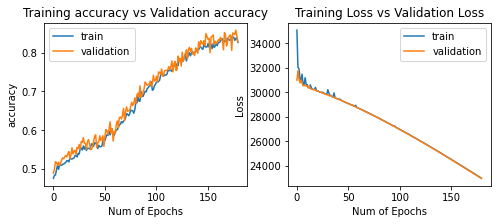

In [80]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'])  
plt.plot(history1.history['val_accuracy'])  
plt.xlabel("Num of Epochs")  
plt.ylabel("accuracy")  
plt.title("Training accuracy vs Validation accuracy")  
plt.legend(['train','validation'])

plt.subplot(1,2,2) 
plt.plot(history1.history['loss'])  
plt.plot(history1.history['val_loss'])  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

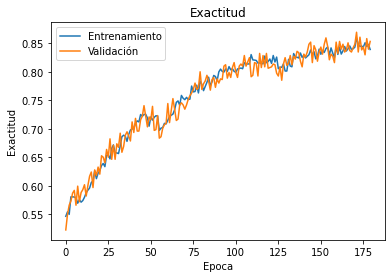

In [73]:
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Exactitud')
plt.ylabel('Exactitud')
plt.xlabel('Epoca')
plt.legend(['Entrenamiento', 'Validación'])
plt.show()

### Certeza de la predicción
Evaluaremos nuestro modelo utilizando 100 muestras, para ello analizaremos tanto la media como deviación estandar de cada predicción.

In [152]:
samplear = 100
ejemplos = 10
pred = []
pred_clasificador = []
modelo_bayesiano = modelo
for i in range(samplear):
    aux = modelo_bayesiano.predict(x_test[:ejemplos,:,:])
    predict = np.array([np.argmax(p) for p in aux]).reshape(10,1)
    aux1 = model.predict(x_test[:ejemplos,:,:])
    predict1 = np.array([np.argmax(p) for p in aux1]).reshape(10,1)
    pred.append(predict)
    pred_clasificador.append(predict1)
pred = np.concatenate(pred, axis=1)

pred_clasificador = np.concatenate(pred_clasificador, axis=1)


1/1 [==============================] - 0s 20ms/step


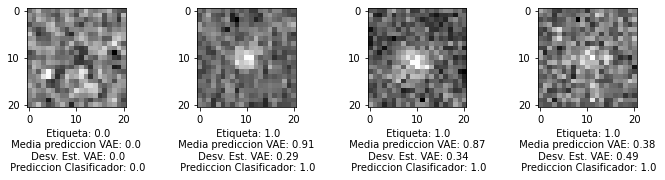

In [153]:
pred_mean = np.mean(pred, axis=1).tolist()
pred_std = np.std(pred, axis=1).tolist()
pred_clasificador_mean = np.mean(pred_clasificador, axis=1).tolist()

plt.figure(figsize=(30, 4))

for i in range(1,5):
    # Imagen Original
    ax = plt.subplot(2, 10, i)   
    plt.imshow(x_test[i,:,:, 0], cmap='gray')
    ax.set_xlabel(f' Etiqueta: {y_test[i]}\n Media prediccion VAE: {pred_mean[i]} \n Desv. Est. VAE: {round(pred_std[i],2)}\n Prediccion Clasificador: {pred_clasificador_mean[i]}')


plt.show()

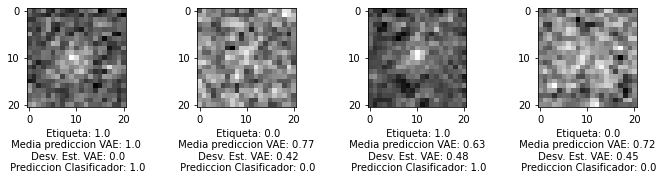

In [154]:
plt.figure(figsize=(30, 4))

for i in range(5,9):
    # Imagen Original
    ax = plt.subplot(2, 10, i)   
    plt.imshow(x_test[i,:,:, 0], cmap='gray')
    ax.set_xlabel(f' Etiqueta: {y_test[i]}\n Media prediccion VAE: {pred_mean[i]} \n Desv. Est. VAE: {round(pred_std[i],2)}\n Prediccion Clasificador: {pred_clasificador_mean[i]}')

plt.show()

### Histogramas para cada clase

In [180]:
clases = []
for i in range(10):
    clases.append(x_test[y_test == i])

In [148]:
samples = 100
num_clases = 2
por_clase = []
for i in range(num_clases):
  pred = []
  for j in range(samples):
    aux = modelo_bayesiano.predict(clases[i])
    predict = np.array([np.argmax(p) for p in aux]).reshape(clases[i].shape[0],1)
    pred.append(predict)
  pred = np.concatenate(pred, axis=0)
  por_clase.append(pred)

16/16 [==============================] - 0s 7ms/step


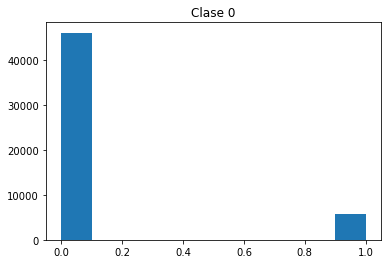

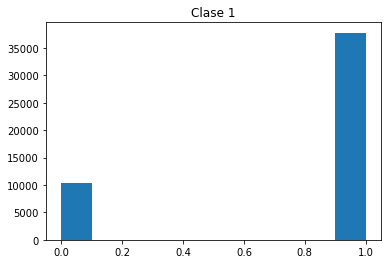

In [149]:
for i in range(num_clases):
  plt.title("Clase " + str(i))
  plt.hist(por_clase[i])
  plt.show()

In [171]:
for i in range(num_clases):
    array = np.array(por_clase[i])
    unique, counts = np.unique(array, return_counts=True)
    result = np.column_stack((unique, counts)) 
    print (result)

[[    0 46102]
 [    1  5798]]
[[    0 10347]
 [    1 37753]]


### Histogramas de media y std por clase


In [172]:

samples = 100
ejemplos = 100
medias_por_clase = []
std_por_clase = []
for i in range(num_clases):
  pred = []
  medias = []
  stds = []
  for j in range(samples):
    aux = modelo_bayesiano.predict(clases[i][:ejemplos])
    pred = np.array([np.argmax(p) for p in aux]).reshape(ejemplos)
    medias.append(pred.mean())
    stds.append(pred.std())
  medias_por_clase.append(medias)
  std_por_clase.append(stds)

4/4 [==============================] - 0s 8ms/step


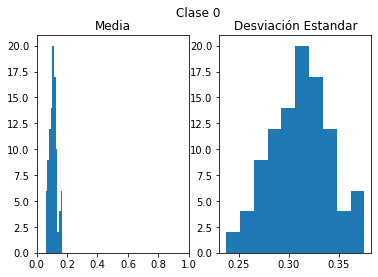

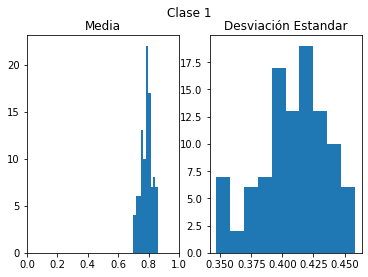

In [173]:


for i in range(num_clases):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.suptitle("Clase " + str(i))
  ax1.hist(medias_por_clase[i])
  ax1.set_title("Media")
  ax1.set_xlim(0,1)
  ax2.hist(std_por_clase[i])
  ax2.set_title("Desviación Estandar")
  ax1.set_xlim(0,1)
  plt.show()



Referencias

- https://keras.io/examples/keras_recipes/bayesian_neural_networks/
- https://keras.io/examples/keras_recipes/bayesian_neural_networks/
- https://www.kaggle.com/piesposito/bayesian-nerual-networks-with-tensorflow-2-0
- https://github.com/tensorflow/probability/blob/main/tensorflow_probability/examples/bayesian_neural_network.py
- https://www.tensorflow.org/probability?hl=es-419